In [1]:
a = [1., 2., 1.]

In [2]:
a[0]

1.0

In [5]:
a[2] = 3.
a

[1.0, 2.0, 3.0]

In [6]:
import torch
a = torch.ones(3)
a

tensor([1., 1., 1.])

In [7]:
a[1]

tensor(1.)

In [8]:
float(a[1])

1.0

In [10]:
a[2] = 3.
a

tensor([1., 1., 3.])

In [14]:
points = torch.zeros(6)
points[0] = 4.
points[1] = 1.
points[2] = 5.
points[3] = 3.
points[4] = 2.
points[5] = 1.

In [13]:
points = torch.tensor([4., 1., 5., 3., 2., 1.])
points

tensor([4., 1., 5., 3., 2., 1.])

In [15]:
float(points[0]), float(points[1])

(4.0, 1.0)

In [16]:
points = torch.tensor([[4., 1.], [5., 3.], [2., 1.]])
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [17]:
points = torch.tensor(((4., 1.), (5., 3.), (2., 1.)))
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [18]:
points.shape

torch.Size([3, 2])

In [20]:
points = torch.zeros(2, 3)
points

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [23]:
import numpy as np
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [30]:
some_list = list(range(6))
print(some_list[:])
print(some_list[1:4]) # 1, 2, 3
print(some_list[1:]) # 1, 2, 3, 4, 5
print(some_list[:-1]) # 5
print(some_list[1:4:2]) # what? goes from [1:4], then selects every second element within this range
print(some_list[-1:-3]) # 4, 5 Move is forward. Empty cuz it's not possible to move forward from -1 and reach -3
print(some_list[-3:-1]) # 3, 4

[0, 1, 2, 3, 4, 5]
[1, 2, 3]
[1, 2, 3, 4, 5]
[0, 1, 2, 3, 4]
[1, 3]
[]
[3, 4]


In [33]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
print(points[1:]) # [5.0, 3.0], [2.0, 1.0]
print(points[1:, :]) # [5.0, 3.0], [2.0, 1.0]
print(points[1:, 0]) # [5.], [2. ]
print(points[None]) # [] surprising result

tensor([[5., 3.],
        [2., 1.]])
tensor([[5., 3.],
        [2., 1.]])
tensor([5., 2.])
tensor([[[4., 1.],
         [5., 3.],
         [2., 1.]]])


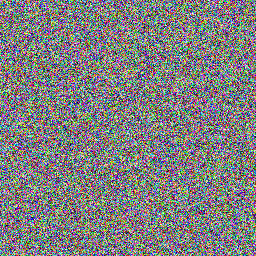

In [36]:
from torchvision import transforms

img = torch.randn(3, 256, 256)
img = transforms.ToPILImage()(img)
img

In [38]:
img_t = torch.randn(3, 5, 5)
weights = torch.tensor([0.2126, 0.7152, 0.0722])

In [39]:
batch_t = torch.randn(2, 3, 5, 5)

In [40]:
img_gray_naive = img_t.mean(-3)
batch_gray_naive = batch_t.mean(-3)
img_gray_naive.shape, batch_gray_naive.shape

(torch.Size([5, 5]), torch.Size([2, 5, 5]))

In [45]:
weights.unsqueeze(-1).unsqueeze_(-1).shape # inplace was unecessary?

torch.Size([3, 1, 1])

weights.shape

In [47]:
unsqueezed_weights = weights.unsqueeze(-1).unsqueeze_(-1)
img_weights = (img_t * unsqueezed_weights)
batch_weights = (batch_t * unsqueezed_weights)
img_gray_weighted = img_weights.sum(-3)
batch_gray_weighted = batch_weights.sum(-3)

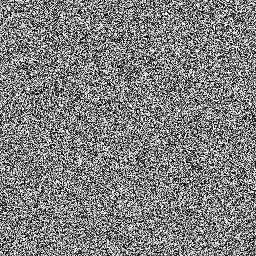

In [48]:
noise_img = torch.randn(3, 256, 256)
gray_noise = (noise_img *unsqueezed_weights).sum(-3)
gray_noise_img = transforms.ToPILImage()(gray_noise)
gray_noise_img

In [49]:
# einsum (https:// rockt.github.io/2018/04/30/einsum)
# Need to revisit

img_gray_weighted_fancy = torch.einsum('...chw,c->...hw', img_t, weights)
batch_gray_weighted_fancy = torch.einsum('...chw,c->...hw', batch_t, weights)
img_gray_weighted_fancy.shape, batch_gray_weighted_fancy.shape

(torch.Size([5, 5]), torch.Size([2, 5, 5]))

In [50]:
weights_named = torch.tensor([0.2126, 0.7152, 0.0722], names=['channels'])

/var/folders/70/z5v4k8l11vs05yb6dxp5c8m40000gn/T/ipykernel_43047/1901091524.py:1: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at /Users/runner/miniforge3/conda-bld/libtorch_1705862670489/work/c10/core/TensorImpl.h:1903.)
  weights_named = torch.tensor([0.2126, 0.7152, 0.0722], names=['channels'])


In [55]:
img_named = img_t.refine_names(...,'channels', 'rows', 'columns')
batch_named = batch_t.refine_names(..., 'channels', 'rows', 'columns')
print(f'img_named:{img_named.shape},{img_named.names}')
print(f'batch_named:{batch_named.shape},{batch_named.names}')

img_named:torch.Size([3, 5, 5]),('channels', 'rows', 'columns')
batch_named:torch.Size([2, 3, 5, 5]),(None, 'channels', 'rows', 'columns')


In [57]:
weights_aligned = weights_named.align_as(img_named)
weights_aligned.shape, weights_aligned.names

(torch.Size([3, 1, 1]), ('channels', 'rows', 'columns'))

In [58]:
gray_named = (img_named * weights_aligned).sum('channels')
gray_named.shape, gray_named.names

(torch.Size([5, 5]), ('rows', 'columns'))

In [62]:
(img_named * weights_named).sum('channels')

RuntimeError: Error when attempting to broadcast dims ['channels', 'rows', 'columns'] and dims ['channels']: dim 'columns' and dim 'channels' are at the same position from the right but do not match.

In [65]:
gray_named = (img_named[..., :3] * weights_named).sum('channels') # not sure why author chose [..., :3]

RuntimeError: Error when attempting to broadcast dims ['channels', 'rows', 'columns'] and dims ['channels']: dim 'columns' and dim 'channels' are at the same position from the right but do not match.

In [67]:
gray_plain = gray_named.rename(None) # some functions won't work with names
gray_plain.shape, gray_plain.names


(torch.Size([5, 5]), (None, None))

In [77]:
torch.tensor([2, 2]).dtype

torch.int64

In [79]:
double_points = torch.ones(10, 2, dtype=torch.double)
half_points = torch.zeros(2, 3, dtype=torch.half)
double_points.dtype, half_points.dtype

(torch.float64, torch.float16)

In [82]:
double_points = torch.zeros(2, 3).double()
short_points = torch.tensor([[2, 3], [4, 5]]).short()
double_points.dtype, short_points.dtype

(torch.float64, torch.int16)

In [83]:
double_points = torch.ones(5, 3).to(torch.double)
short_points = torch.tensor([[5, 3], [2, 2]]).to(torch.float32)
double_points.dtype, short_points.dtype

(torch.float64, torch.float32)

In [84]:
points_64 = torch.randn(5, dtype=torch.double)
points_32 = points_64.to(torch.float32)
points_64 * points_32

tensor([0.9085, 0.0288, 0.1784, 0.2208, 0.5156], dtype=torch.float64)

In [85]:
a = torch.ones(2, 3)
a_t = a.transpose(0, 1)
a.shape, a_t.shape

(torch.Size([2, 3]), torch.Size([3, 2]))

In [86]:
a = torch.ones(2, 3)
a_t = torch.transpose(a, 0, 1)
a.shape, a_t.shape

(torch.Size([2, 3]), torch.Size([3, 2]))

In [88]:
points = torch.tensor([[4., 1.], [5., 3.], [2., 1.]])
points.storage()

/var/folders/70/z5v4k8l11vs05yb6dxp5c8m40000gn/T/ipykernel_43047/1089626145.py:2: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  points.storage()


 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]

In [91]:
points.storage()[1]

1.0

In [92]:
points.storage()[3] = 999
points

tensor([[  4.,   1.],
        [  5., 999.],
        [  2.,   1.]])

In [94]:
a = torch.ones(2, 4)
a.zero_()
a

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [96]:
second_points = points[1]
second_points.storage_offset()

2

In [98]:
second_points.size()

torch.Size([2])

In [100]:
second_points.stride(), points.stride()

((1,), (2, 1))

In [101]:
second_points[1]=3.
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [102]:
second_points = points[1].clone()
second_points[1] = 55
second_points, points

(tensor([ 5., 55.]),
 tensor([[4., 1.],
         [5., 3.],
         [2., 1.]]))

In [103]:
points_t = points.t()
points, points_t

(tensor([[4., 1.],
         [5., 3.],
         [2., 1.]]),
 tensor([[4., 5., 2.],
         [1., 3., 1.]]))

In [105]:
id(points.storage()) == id(points_t.storage())

True

In [107]:
points.stride(), points_t.stride()

((2, 1), (1, 2))

In [112]:
nums = torch.arange(0, 60)
nums

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59])

In [113]:
nums_345 = nums.view(3, 4, 5)
nums_345

tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49],
         [50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59]]])

In [114]:
nums_543 = nums_345.transpose(0, 2)
nums_543

tensor([[[ 0, 20, 40],
         [ 5, 25, 45],
         [10, 30, 50],
         [15, 35, 55]],

        [[ 1, 21, 41],
         [ 6, 26, 46],
         [11, 31, 51],
         [16, 36, 56]],

        [[ 2, 22, 42],
         [ 7, 27, 47],
         [12, 32, 52],
         [17, 37, 57]],

        [[ 3, 23, 43],
         [ 8, 28, 48],
         [13, 33, 53],
         [18, 38, 58]],

        [[ 4, 24, 44],
         [ 9, 29, 49],
         [14, 34, 54],
         [19, 39, 59]]])

In [115]:
nums_345.stride(), nums_543.stride()

((20, 5, 1), (1, 5, 20))

In [117]:
points.is_contiguous(), points_t.is_contiguous()

(True, False)

In [118]:
points.storage()

 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]

In [121]:
points_t.stride(), points_t.storage()

((1, 2),
  4.0
  1.0
  5.0
  3.0
  2.0
  1.0
 [torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6])

In [122]:
points_t_cont = points_t.contiguous()
points_t_cont.stride(), points_t_cont.storage()

((3, 1),
  4.0
  5.0
  2.0
  1.0
  3.0
  1.0
 [torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6])

In [126]:
points_gpu = torch.tensor([[4., 1.],[5., 3.], [2., 1.]], device='mps')
points_gpu

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]], device='mps:0')

In [127]:
points_gpu.to(device='mps')

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]], device='mps:0')

In [129]:
points_gpu = points.to(device='mps:1')
points_gpu

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]], device='mps:0')

In [132]:
points_np = points.numpy()
points_np

array([[4., 1.],
       [5., 3.],
       [2., 1.]], dtype=float32)

In [133]:
torch.from_numpy(points_np)

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [135]:
points.device, points_gpu.device

(device(type='cpu'), device(type='mps', index=0))

In [136]:
points_gpu[1] = 999.
points, points_gpu

(tensor([[4., 1.],
         [5., 3.],
         [2., 1.]]),
 tensor([[  4.,   1.],
         [999., 999.],
         [  2.,   1.]], device='mps:0'))

In [137]:
torch.save(points, '../data/p1ch3/points.t')

In [138]:
with open('../data/p1ch3/points.t', 'wb') as f:
    torch.save(points, f)

In [139]:
points = torch.load('../data/p1ch3/points.t')
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [143]:
with open('../data/p1ch3/points.t', 'rb') as f:
    # print(type(f))
    points = torch.load(f)

In [144]:
#!conda install h5py
import h5py

f = h5py.File('../data/p1ch3/points.hdf5', 'w')
dset = f.create_dataset('coords', data=points.numpy())
f.close()

In [148]:
f = h5py.File('../data/p1ch3/points.hdf5', 'r')
dset = f['coords']
last_points = dset[-2:]
last_points

array([[5., 3.],
       [2., 1.]], dtype=float32)

In [149]:
last_points_t = torch.from_numpy(last_points)
last_points_t

tensor([[5., 3.],
        [2., 1.]])

In [150]:
last_points_t = torch.from_numpy(dset[-2:])
f.close()
last_points_t

tensor([[5., 3.],
        [2., 1.]])